# Final Assignment - [Analytics] Python ML Training Plan Basics - *Chandan Narad*
## Tasks:
##### Performing EDA on the dataset including summary metrics, preprocessing steps, handling missing values, and outliers.
##### Ensuring plots have clearly defined legends, axis titles, labels, and insights mentioned.
##### Implementing the following algorithms:
##### Logistic Regression
##### k-Nearest Neighbors (k-NN)
##### Decision Trees
##### Random Forest
##### Selecting the best model with a valid justification.
##### Evaluating the chosen model.

## Importing all essential libraries

In [230]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

## Reading the given CSV file

In [233]:
df = pd.read_csv("C:/Users/chandan.narad/Desktop/assignment_data.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [234]:
df.shape

(32561, 15)

In [235]:
df.info
# This will give a rough overview of data that we are dealing with here

<bound method DataFrame.info of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

## Removing some unwanted special character that may cause hinderance in the future

#### Upon looking at the data manually in text format, I came across some random question marks in the data that is necessary to remove. These question marks did not come up in either head or tail of dataframe.

In [236]:
print(df.iloc[[27]])

    age workclass  fnlwgt      education  education-num       marital-status  \
27   54         ?  180211   Some-college             10   Married-civ-spouse   

   occupation relationship                 race    sex  capital-gain  \
27          ?      Husband   Asian-Pac-Islander   Male             0   

    capital-loss  hours-per-week native-country income  
27             0              60          South   >50K  


## Observation- We can see Question Marks in some places where data is not known. 
## Solution- We will have to remove these in the following way:

In [237]:
df = pd.DataFrame(df)

In [238]:
df['workclass'][27]

' ?'

In [239]:
df.replace(' ?', '', inplace=True)
print(df.iloc[[27]])

    age workclass  fnlwgt      education  education-num       marital-status  \
27   54            180211   Some-college             10   Married-civ-spouse   

   occupation relationship                 race    sex  capital-gain  \
27                 Husband   Asian-Pac-Islander   Male             0   

    capital-loss  hours-per-week native-country income  
27             0              60          South   >50K  


## We have some extra spaces that will hinder our code in the future so we will strip them.

In [240]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Check for Missing values

In [241]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull()

# Check for missing values and sum them up for each column
missing_values_sum = df.isnull().sum()

# Print out missing values
print(missing_values)
print(missing_values_sum)

         age  workclass  fnlwgt  education  education-num  marital-status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    sex  capital-gain  capital-loss  

In [242]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


## Observation- No Missing Value in data

## Check for Null Values

In [243]:
# Checking for null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Observation- No Null Values found 

## Checking for Duplicated Values

In [245]:
df.duplicated().sum()

24

In [246]:
# shape before removing duplicates
df.shape

(32561, 15)

In [247]:
# Check for duplicates
duplicates = df.duplicated()

# Drop duplicate values
df.drop_duplicates(inplace=True)

In [248]:
# shape after removing duplicates
df.shape

(32537, 15)

In [249]:
# checking again
df.duplicated().sum()

0

## Observation- There were 24 duplicate values. We have removed them using drop_duplicate function.

## Statistical Analysis

In [250]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Exploratory Analysis                             

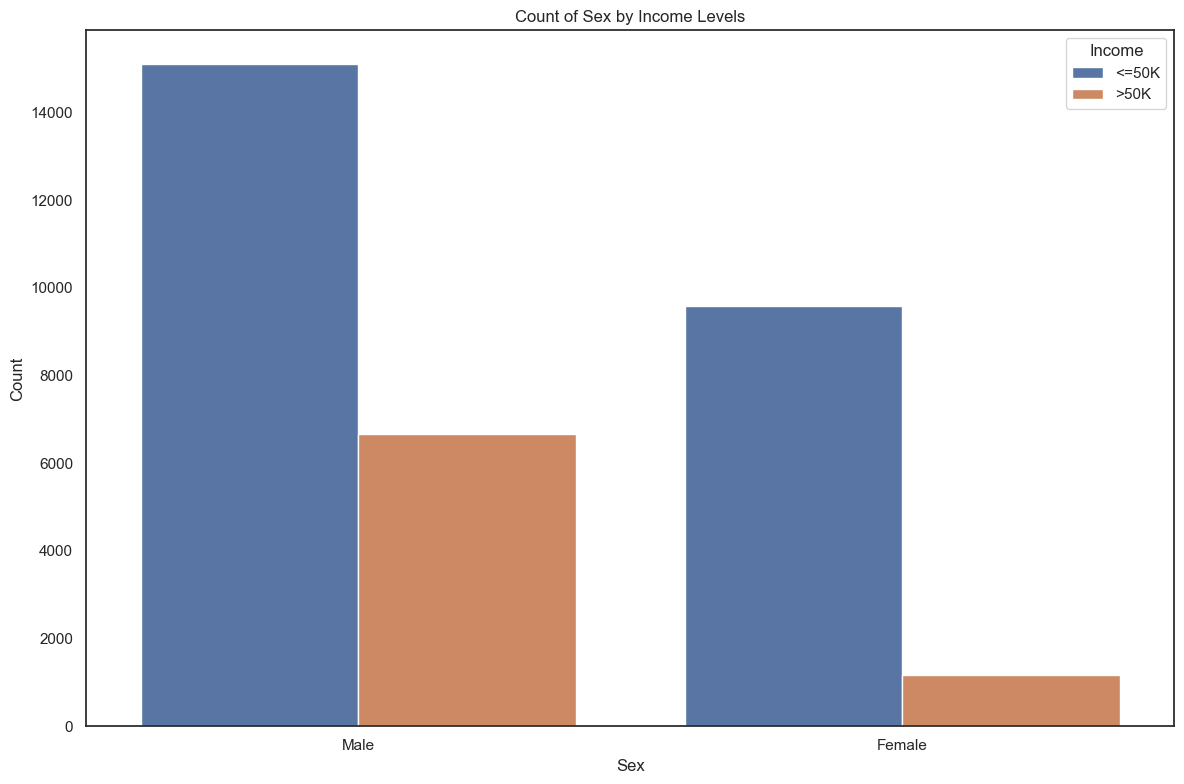

In [259]:
plt.figure(figsize=(12, 8))
sns.countplot(x='sex', hue='income', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Sex by Income Levels')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

## Insight- There are far more male earning >50k than female, but at the same time there are also more male earning <50k and even more males recorded in general
## Also- Male data is way more than female data. The counts need to be normalized.

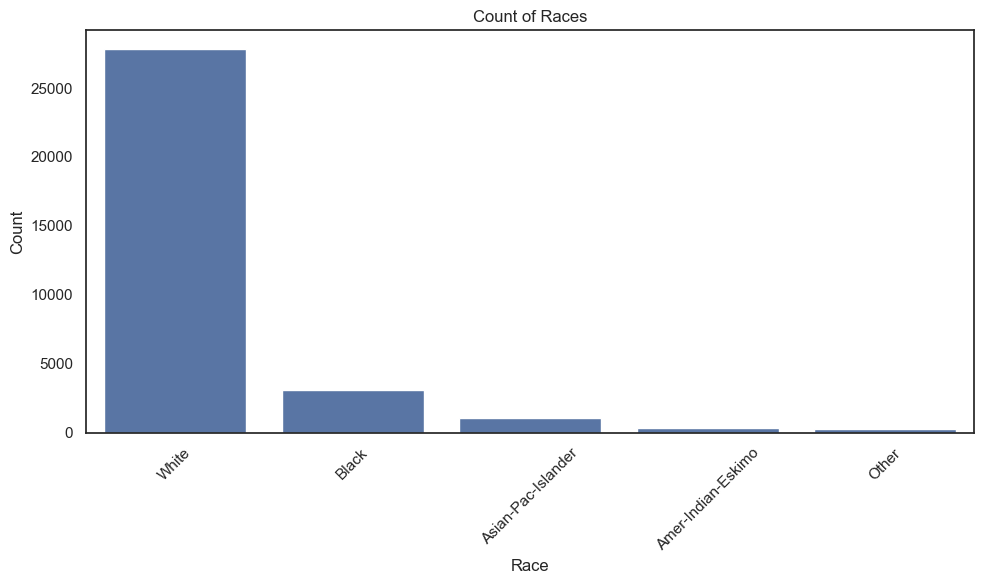

In [252]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(x=df['race'])  # Create a vertical bar plot
plt.xlabel('Race')  # Label for the x-axis (race categories)
plt.ylabel('Count')  # Label for the y-axis (counts)
plt.title('Count of Races')  # Title of the plot
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to ensure labels are not cut off
plt.show()

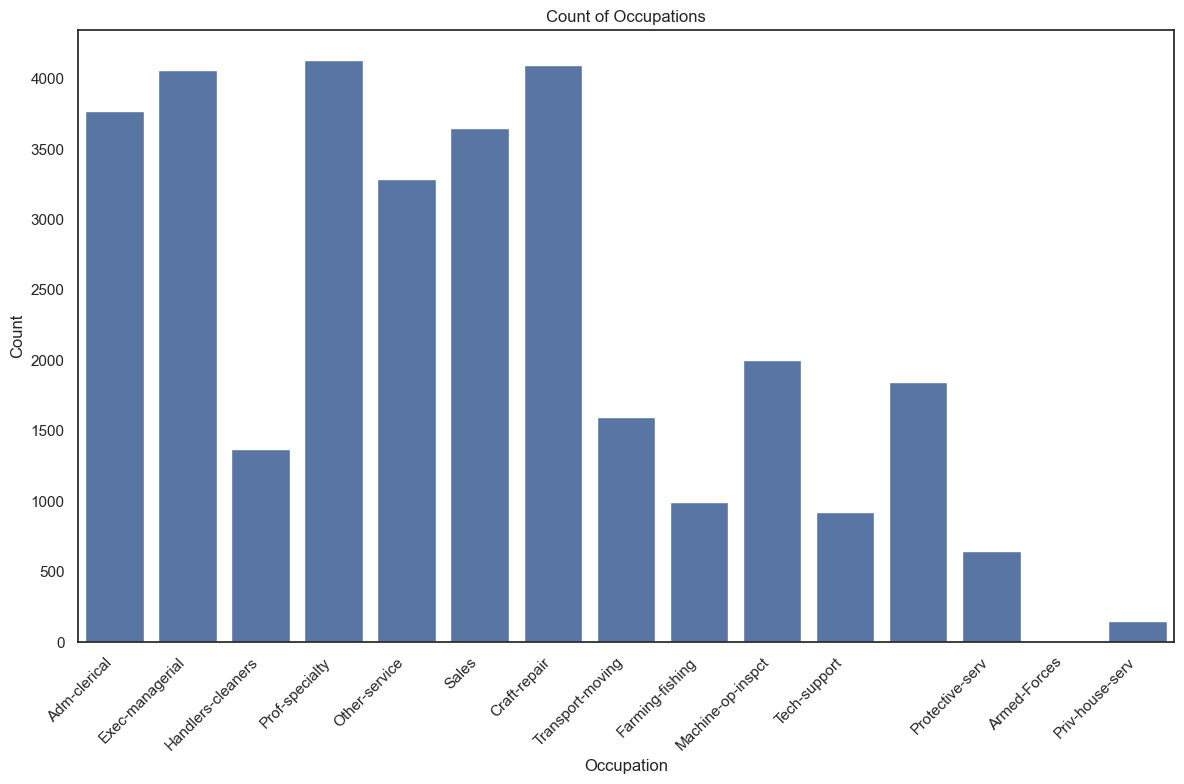

In [253]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.countplot(x=df['occupation'])  # Create a vertical bar plot
plt.xlabel('Occupation')  # Label for the x-axis (occupation categories)
plt.ylabel('Count')  # Label for the y-axis (counts)
plt.title('Count of Occupations')  # Title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.tight_layout()  # Adjust layout to ensure labels are not cut off
plt.show()

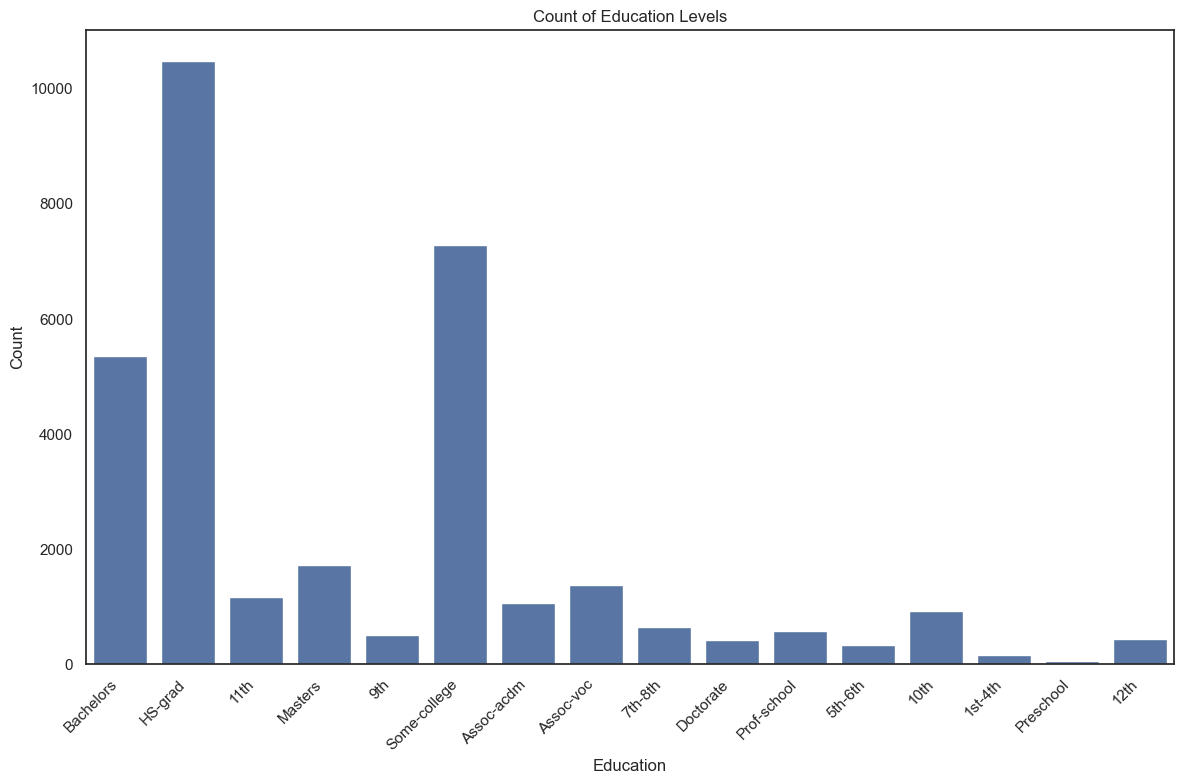

In [254]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.countplot(x=df['education'])  # Create a vertical bar plot
plt.xlabel('Education')  # Label for the x-axis (education categories)
plt.ylabel('Count')  # Label for the y-axis (counts)
plt.title('Count of Education Levels')  # Title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.tight_layout()  # Adjust layout to ensure labels are not cut off
plt.show()

C:\Users\chandan.narad\AppData\Local\Temp\ipykernel_1456\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

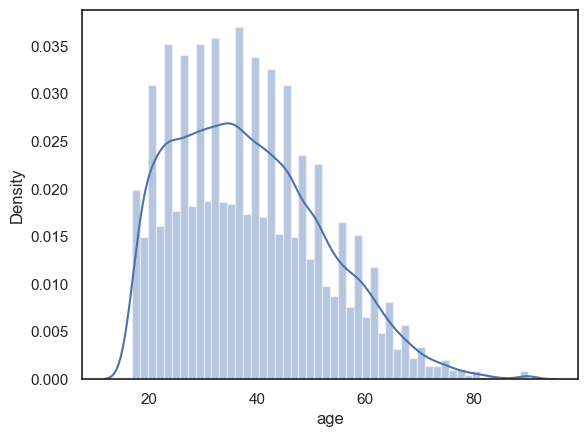

In [255]:
sns.distplot(df['age'])

## Bivariate Analysis: Income (<=50k, >50k) w.r.t age, fnlwgt, education_num, capital gain, capital loss and hours per week

In [160]:
fun2 = df.select_dtypes(include=['int64']).columns
fun2

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

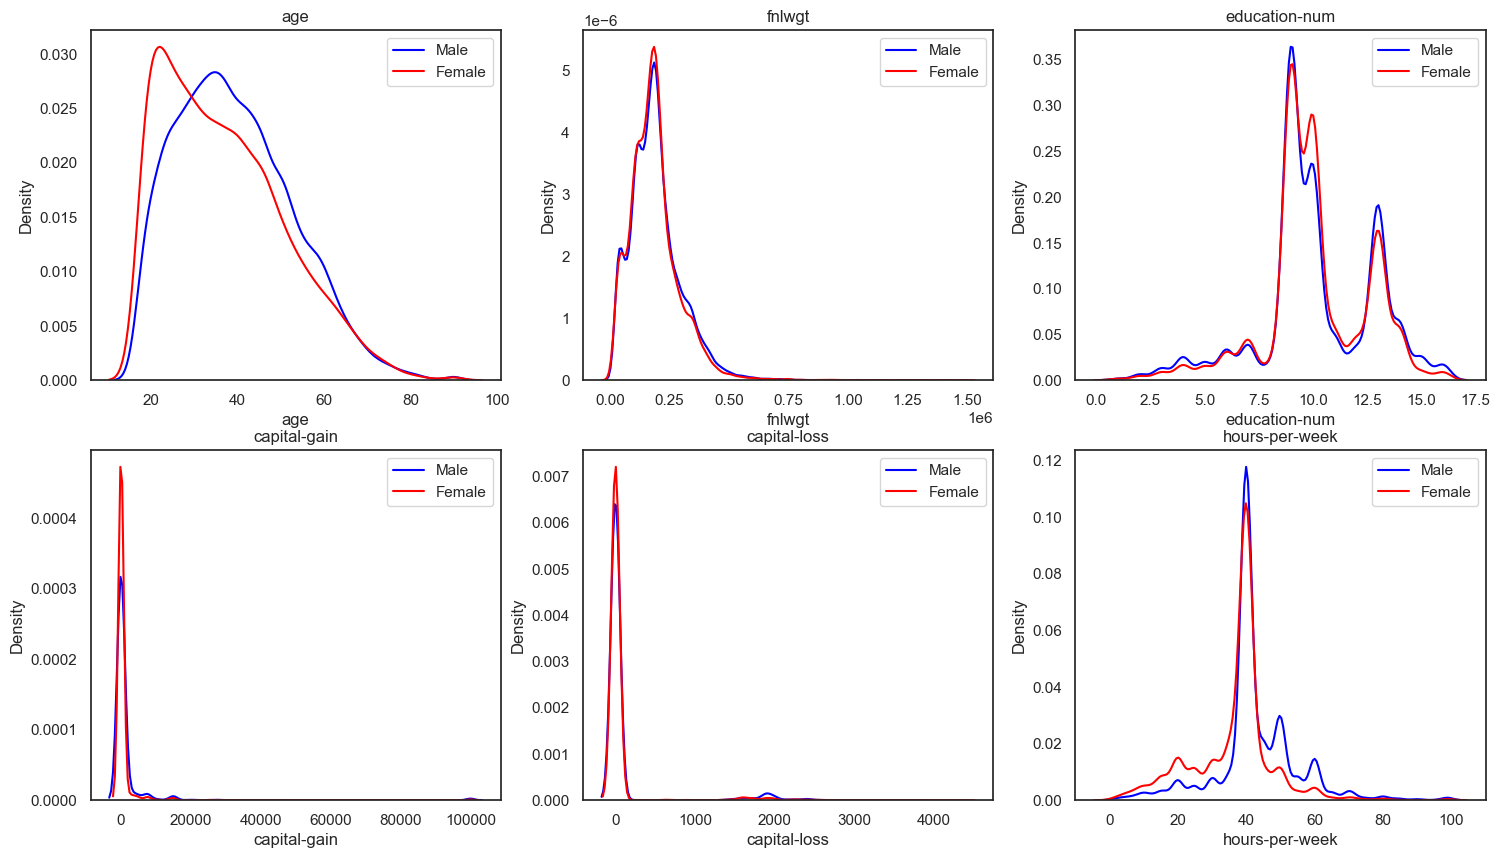

In [166]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i = 0
for c in fun2:
    plt.subplot(2, 3, i + 1)
    i += 1
    sns.kdeplot(df[df['sex'] == 'Male'][c], color='blue', label='Male')
    sns.kdeplot(df[df['sex'] == 'Female'][c], color='red', label='Female')
    plt.title(c)
    plt.legend()

plt.show()


## Insight- There are significant differences when it comes to capital gain / loss and hours per week.

## Normalization:

In [167]:
cols = list(df.columns)
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [168]:
# nb of female / male
nb_female = (df.sex == 'Female').astype('int').sum()
nb_male = (df.sex == 'Male').astype('int').sum()
nb_female, nb_male

(10762, 21775)

In [169]:
# nb of people earning more or less than 50k per gender
nb_male_above = len(df[(df.income == '>50K') & (df.sex == 'Male')])
nb_male_below = len(df[(df.income == '<=50K') & (df.sex == 'Male')])
nb_female_above = len(df[(df.income == '>50K') & (df.sex == 'Female')])
nb_female_below = len(df[(df.income == '<=50K') & (df.sex == 'Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(6660, 15115, 1179, 9583)

In [170]:
print(f'Among Males   : {nb_male_above/nb_male*100:.0f}% earn >50K // {nb_male_below/nb_male*100:.0f}% earn <=50K')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50K // {nb_female_below/nb_female*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [171]:
# normalization
nb_male_above /= nb_male 
nb_male_below /= nb_male
nb_female_above /= nb_female
nb_female_below /= nb_female
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(0.3058553386911596,
 0.6941446613088404,
 0.1095521278572756,
 0.8904478721427244)

In [172]:
print(f'Among people earning >50K  : {nb_male_above / (nb_male_above + nb_female_above) *100 :.0f}% are Females and {nb_female_above / (nb_male_above + nb_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50K : {nb_male_below / (nb_male_below + nb_female_below) *100 :.0f}% are Females and {nb_female_below / (nb_male_below + nb_female_below) *100 :.0f}% are Males')

Among people earning >50K  : 74% are Females and 26% are Males
Among people earning =<50K : 44% are Females and 56% are Males


## I see a strong relation of income with sex of the person and also with the fact that whether or not he is a US native.

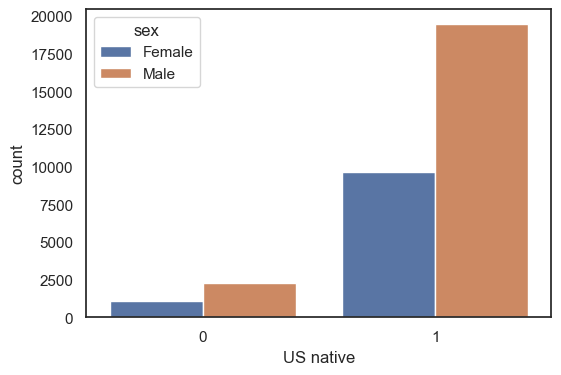

In [173]:
# Distinction between American natives and other nationalities are to be made
df['US native'] = (df['native-country'] == 'United-States').astype('int')
plt.figure(figsize=(6,4))
sns.countplot(x='US native', data=df, hue='sex')
plt.show()

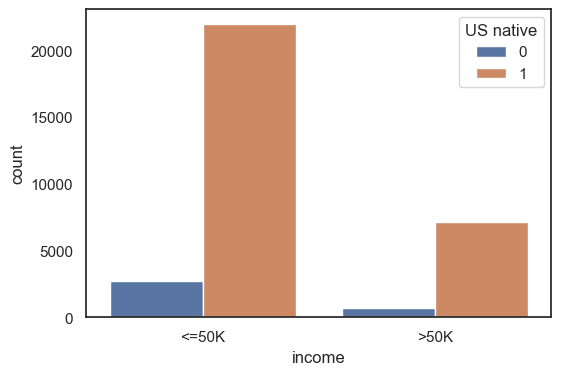

In [174]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df, hue='US native')
plt.show()

In [175]:
# nb of people earning more or less than 50k per origin
nb_native_above = len(df[(df.income == '>50K') & (df['US native'] == 1)])
nb_native_below = len(df[(df.income == '<=50K') & (df['US native'] == 1)])
nb_foreign_above = len(df[(df.income == '>50K') & (df['US native'] == 0)])
nb_foreign_below = len(df[(df.income == '<=50K') & (df['US native'] == 0)])
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(7169, 21984, 670, 2714)

In [176]:
nb_native = (df['US native'] == 1).astype('int').sum()
nb_foreign = df.shape[0] - nb_native
nb_native, nb_foreign

(29153, 3384)

In [177]:
print(f'Among natives    : {nb_native_above/nb_native*100:.0f}% earn >50K // {nb_native_below/nb_native*100:.0f}% earn <=50K')
print(f'Among foreigners : {nb_foreign_above/nb_foreign*100:.0f}% earn >50K // {nb_foreign_below/nb_foreign*100:.0f}% earn <=50K')

Among natives    : 25% earn >50K // 75% earn <=50K
Among foreigners : 20% earn >50K // 80% earn <=50K


In [178]:
# normalization
nb_native_above /= nb_native
nb_native_below /= nb_native
nb_foreign_above /= nb_foreign
nb_foreign_below /= nb_foreign
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(0.24590951188556923,
 0.7540904881144308,
 0.1979905437352246,
 0.8020094562647754)

In [179]:
print(f'Among people earning >50K  : {nb_native_above / (nb_native_above + nb_foreign_above) *100 :.0f}% are natives and {nb_foreign_above / (nb_native_above + nb_foreign_above) *100 :.0f}% are foreigners')
print(f'Among people earning =<50K : {nb_native_below / (nb_native_below + nb_foreign_below) *100 :.0f}% are natives and {nb_foreign_below / (nb_native_below + nb_foreign_below) *100 :.0f}% are foreigners')

Among people earning >50K  : 55% are natives and 45% are foreigners
Among people earning =<50K : 48% are natives and 52% are foreigners


## Preparing data and having overview of data before implementing ML Algorithms:

In [182]:
df['income'] = pd.get_dummies(df['income'], prefix='income', drop_first=True)

In [183]:
y = df.income
df = df.drop(columns=['income'])

In [184]:
print(f'Ratio above 50k:  {y.sum()/len(y)*100:.2f}%')

Ratio above 50k:  24.09%


In [185]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,US native
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [186]:
cols = list(df.columns)
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'US native']

In [187]:
selected_feat = cols.copy()
selected_feat.remove('US native')
selected_feat

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [188]:
df_final = df[selected_feat]

In [189]:
cat_feat = df_final.select_dtypes(include=['object']).columns
X = pd.get_dummies(df_final[cat_feat], drop_first=True)

# Train Test Split 
### (We have trained our models on 80% of data and used 20% data for testing)

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
def print_score(model, name):
    model.fit(X_train, y_train)
    print('Accuracy score of the', name, f': on train = {model.score(X_train, y_train)*100:.2f}%, on test = {model.score(X_test, y_test)*100:.2f}%')

# Logistic Regression

In [222]:
print_score(LogisticRegression(), 'LogisticReg')

Accuracy score of the LogisticReg : on train = 83.28%, on test = 82.90%


# Decision Tree

In [193]:
print_score(DecisionTreeClassifier(), 'DecisionTreeClf')

Accuracy score of the DecisionTreeClf : on train = 86.87%, on test = 81.67%


# K-Nearest Neighbours

In [194]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Use the print_score function to evaluate the KNN model
print_score(knn, 'K-Nearest Neighbors')


Accuracy score of the K-Nearest Neighbors : on train = 82.51%, on test = 79.84%


# Random Forest

In [195]:
rf = RandomForestClassifier().fit(X_train, y_train)
print(f'Accuracy score of the RandomForrest: on train = {rf.score(X_train, y_train)*100:.2f}%, on test = {rf.score(X_test, y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on train = 86.86%, on test = 82.33%


In [223]:
# fit an Extra Tree model to the data
print_score(DecisionTreeClassifier(), 'ExtraTreesClf')

Accuracy score of the ExtraTreesClf : on train = 86.87%, on test = 81.53%


# Random Forest is the best ML Algorithm for this model because it has Accuracy score on train = 86.87%, on test = 82.28% which is more than all other algorithms.

# Tuned Model

In [197]:
rfc = RandomForestClassifier()
param_grid = { 
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': [1, 2, 3, 4, 5],
    'max_depth' : [4, 6, 8]
}

In [132]:
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [198]:
rfc_cv.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 200}

In [199]:
rfc_best = RandomForestClassifier(max_depth=8, max_features=5, n_estimators=250).fit(X_train, y_train)
print(f'Accuracy score of the RandomForrest: on train = {rfc_best.score(X_train, y_train)*100:.2f}%, on test = {rfc_best.score(X_test, y_test)*100:.2f}%')


Accuracy score of the RandomForrest: on train = 80.56%, on test = 79.79%


## A fine tuned model has accuracy of 86.87% on train and 82.28% on test.

In [202]:
# indexes of columns which are the most important
np.argsort(rf.feature_importances_)[-16:]

array([17, 36, 91,  3, 21, 46, 18, 19, 45, 52, 43, 38, 16, 32, 26, 24],
      dtype=int64)

In [203]:
# most important features
[list(X.columns)[i] for i in np.argsort(rf.feature_importances_)[-16:]][::-1]

['marital-status_Married-civ-spouse',
 'marital-status_Never-married',
 'occupation_Exec-managerial',
 'education_Bachelors',
 'occupation_Prof-specialty',
 'relationship_Not-in-family',
 'sex_Male',
 'relationship_Own-child',
 'education_Masters',
 'education_HS-grad',
 'relationship_Unmarried',
 'education_Prof-school',
 'workclass_Private',
 'native-country_United-States',
 'occupation_Other-service',
 'education_Doctorate']

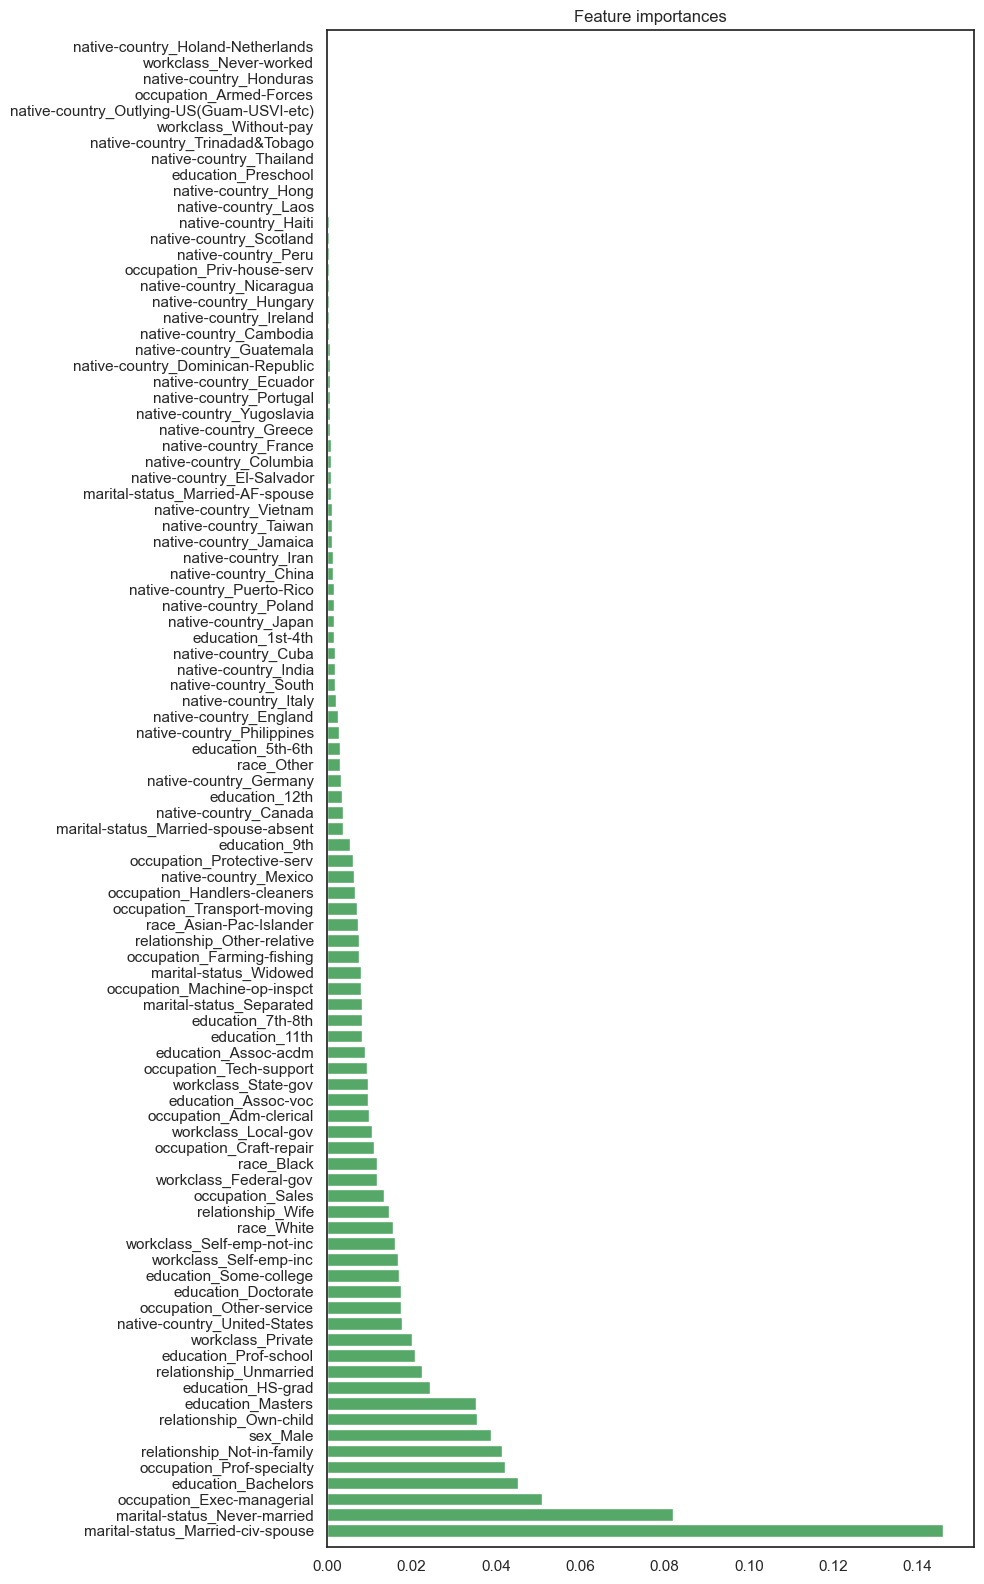

marital-status_Married-civ-spouse - 0.146
marital-status_Never-married - 0.082
occupation_Exec-managerial - 0.051
education_Bachelors - 0.045
occupation_Prof-specialty - 0.042
relationship_Not-in-family - 0.041
sex_Male - 0.039
relationship_Own-child - 0.036
education_Masters - 0.035
education_HS-grad - 0.024
relationship_Unmarried - 0.022
education_Prof-school - 0.021
workclass_Private - 0.020
native-country_United-States - 0.018
occupation_Other-service - 0.018
education_Doctorate - 0.017
education_Some-college - 0.017
workclass_Self-emp-inc - 0.017
workclass_Self-emp-not-inc - 0.016
race_White - 0.016
relationship_Wife - 0.015
occupation_Sales - 0.013
workclass_Federal-gov - 0.012
race_Black - 0.012
occupation_Craft-repair - 0.011
workclass_Local-gov - 0.011
occupation_Adm-clerical - 0.010
education_Assoc-voc - 0.010
workclass_State-gov - 0.010
occupation_Tech-support - 0.009
education_Assoc-acdm - 0.009
education_11th - 0.008
education_7th-8th - 0.008
marital-status_Separated - 0.0

In [258]:
# Feature importances
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

plt.figure(figsize=(10, 16))  # Adjust figsize for horizontal layout
plt.title("Feature importances")
plt.barh(range(num_features), importances[indices], color="g", align="center")  # Use plt.barh for horizontal bars
plt.yticks(range(num_features), [features[i] for i in indices])  # Set y-axis ticks and labels
plt.ylim([-1, num_features])  # Adjust ylim for horizontal layout
plt.tight_layout()  # Ensures labels are not cut off
plt.show()
# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

# End of the assignment